# Boston Housing Prices

### Libraries

In [1]:
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

### The Dataset

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

- **crim:** per capita crime rate by town.
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town.
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox:** nitrogen oxides concentration (parts per 10 million).
- **rm:** average number of rooms per dwelling.
- **age:** proportion of owner-occupied units built prior to 1940.
- **dis:** weighted mean of distances to five Boston employment centres.
- **rad:** index of accessibility to radial highways.

- **tax:** full-value property-tax rate per \$10000 dollars.
- **ptratio:** pupil-teacher ratio by town.
- **black:** $1000(Bk - 0.63)^{2}$ where Bk is the proportion of blacks by town.
- **lstat:** lower status of the population (percent).
- **medv:** median value of owner-occupied homes in \$1000s.

In [6]:
df = pd.read_csv('data/houses.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [47]:
crime = df['crim']
value = df['medv']*1000

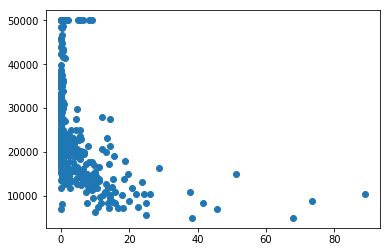

In [81]:
plt.scatter(crime, value);

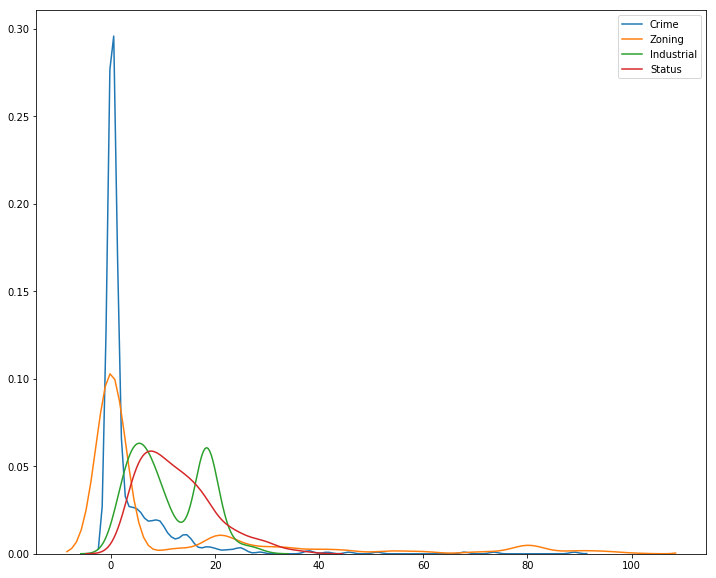

In [80]:

f, ax = plt.subplots(figsize = (12, 10))
ax = sns.distplot(df['crim'], ax=ax,
             hist=False, label ='Crime');

sns.distplot(df['zn'], ax=ax,
             hist=False, label ='Zoning');
sns.distplot(df['indus'], ax=ax,
             hist=False, label ='Industrial');
sns.distplot(df['lstat'], ax=ax,
             hist=False, label ='Status');
ax.legend()
ax.set_xlabel(None);

In [65]:
df.loc[df['age'] <=0]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


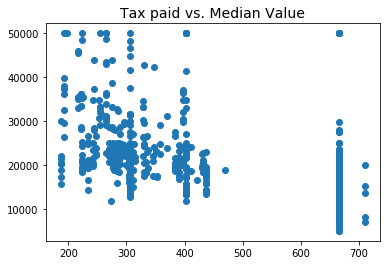

In [49]:
tax = df['tax']
plt.title('Tax paid vs. Median Value', fontsize = 14)
plt.scatter(tax, value);